# Homework 2

## Part 1 - Apartment Prices

### Price per square meter

In [29]:
data <- read.csv("Booli_sold.csv")
price <- data$soldPrice
living_area <- data$livingArea
ppsqm <- ceiling(price/living_area)
data$ppsqm <- ppsqm

### Top 5 most expensive apartments

In [55]:
library("knitr")
library("kableExtra")
data_sorted_ppsqm <- data[order(data$ppsqm, decreasing = TRUE), ]
top_five <- data.frame(data_sorted_ppsqm[1:5, c(17, 28, 9)])
top_five_df <- data.frame(Adress = top_five[, 1], Ppsqm = top_five[,2], SoldDate=top_five[,3])
top_five_df %>%
  kable("html", caption = "Table 1: Top 5 most expensive apartments - Price per Sqm", escape = FALSE, col.names = c("Street Adress", "Price per Sqm", "Sold Date")) %>%
  kable_styling(full_width = F, position = "left") %>%  
  row_spec(0, background = "lightsteelblue") 

<table class="table" style="width: auto !important; ">
<caption>Table 1: Top 5 most expensive apartments -       Price per Sqm</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Street Adress </th>
   <th style="text-align:right;background-color: lightsteelblue !important;"> Price per Sqm </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Sold Date </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Ekhagsvägen 8 </td>
   <td style="text-align:right;"> 104167 </td>
   <td style="text-align:left;"> 2016-01-21 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ekhagsvägen 8 </td>
   <td style="text-align:right;"> 102084 </td>
   <td style="text-align:left;"> 2016-06-21 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ekhagsvägen 10 </td>
   <td style="text-align:right;"> 100000 </td>
   <td style="text-align:left;"> 2016-04-28 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Torphagsvägen 4 </td>
   <td style="text-align:right;"> 88400 </td>
   <td style="text-align:left;"> 2017-06-01 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Docentbacken 1B </td>
   <td style="text-align:right;"> 85502 </td>
   <td style="text-align:left;"> 2016-04-19 </td>
  </tr>
</tbody>
</table>

### Avereage price per sqm in Ekhagen

In [ ]:
ppsqm_avrage <- ceiling(sum(ppsqm, na.rm = TRUE)/length(ppsqm))

The avereage price per square meter in ekhagen is 58 388 kr.

### Price per square meter over time

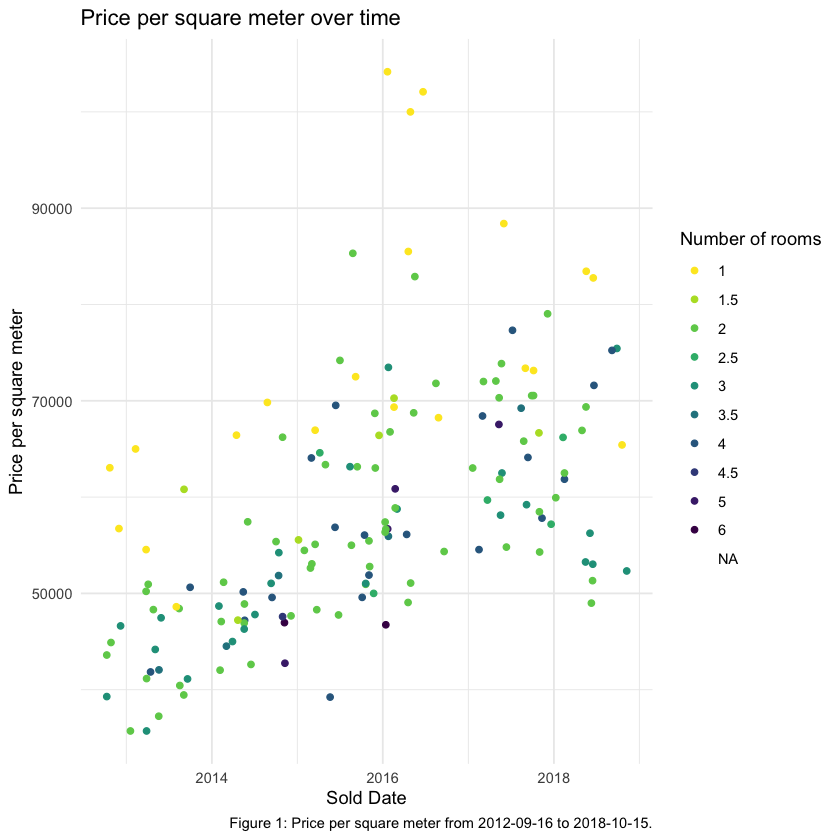

In [61]:
library("ggplot2")
data$soldDate <- as.Date(data$soldDate)
options(warn = -1)
  ggplot(data, aes(x = soldDate, y = ppsqm, color = factor(rooms))) +
    geom_point() +  
    scale_color_viridis_d(direction = -1) + 
    labs(title = "Price per square meter over time", 
         x = "Sold Date", 
         y = "Price per square meter",
         caption = "Figure 1: Price per square meter from 2012-09-16 to 2018-10-15.",
         color = "Number of rooms") + 
    theme_minimal()

The plot in figure 1 shows the price per square meter over time in ekhagen. It also highligths the diffrens in price depending on the number of rooms. The plot clearly shows that the price has increased seemingly linearly over the time and the difference in price per square meter cleraly depends on the number of rooms as the smaller apartments with one or one and a half rooms have a higher price per square meter compared to the others. I have chosen to highligt this since i belive it is a good representation of the difference in price per square meter in regards to smaller apartments.

## Part two - The Swedish election of 2018

### Legitimate votes in Stockholm

In [63]:
data2 <- read.csv2("2018_R_per_kommun.csv")
stock <- data2[data2$LÄNSKOD == "1",]
lv_stock <- sum(stock[,42])

The total number of legitimate votes in stockholm is 1 426 237. 

### Municipality with highest percentage of votes for S

In [66]:
kommun_s <- stock[, c(4, 9)]
kommun_s_max <- kommun_s[,1][which.max(kommun_s[,2])]

The municipality with highest percentage of votes for the social democratic party is Botkyrka. 

### Municipialities with highest participation

The municipalities with highest participation, shown in table 2, are Vaxholm, Ekerö and Danderyd.

In [79]:
library("knitr")
library("kableExtra")
library("dplyr")
kommun_p <- stock[,c(4,45)]
kommun_p_max <- kommun_p[order(kommun_p[,2], decreasing = TRUE), ][1:3, ]
kommun_p_max_df <- data.frame(
  Kommunnamn = kommun_p_max$KOMMUNNAMN,
  Valdeltagande = kommun_p_max$VALDELTAGANDE) %>%
  dplyr::mutate(Valdeltagande = paste0(Valdeltagande, "%"))
kommun_p_max_df %>%
  kable("html", caption = "Tabel 2: Top 3 municipalities with highets partitcipation",  escape = FALSE, col.names = c("Municipality", "Participation")) %>%
  kable_styling(full_width = F, position = "left") %>%  
  row_spec(0, background = "lightsteelblue") 

<table class="table" style="width: auto !important; ">
<caption>Tabel 2: Top 3 municipalities with highets partitcipation</caption>
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Municipality </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Participation </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Vaxholm </td>
   <td style="text-align:right;"> 92.74% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Ekerö </td>
   <td style="text-align:right;"> 92.16% </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Danderyd </td>
   <td style="text-align:right;"> 91.92% </td>
  </tr>
</tbody>
</table>

## Part three - Predicting Strokes

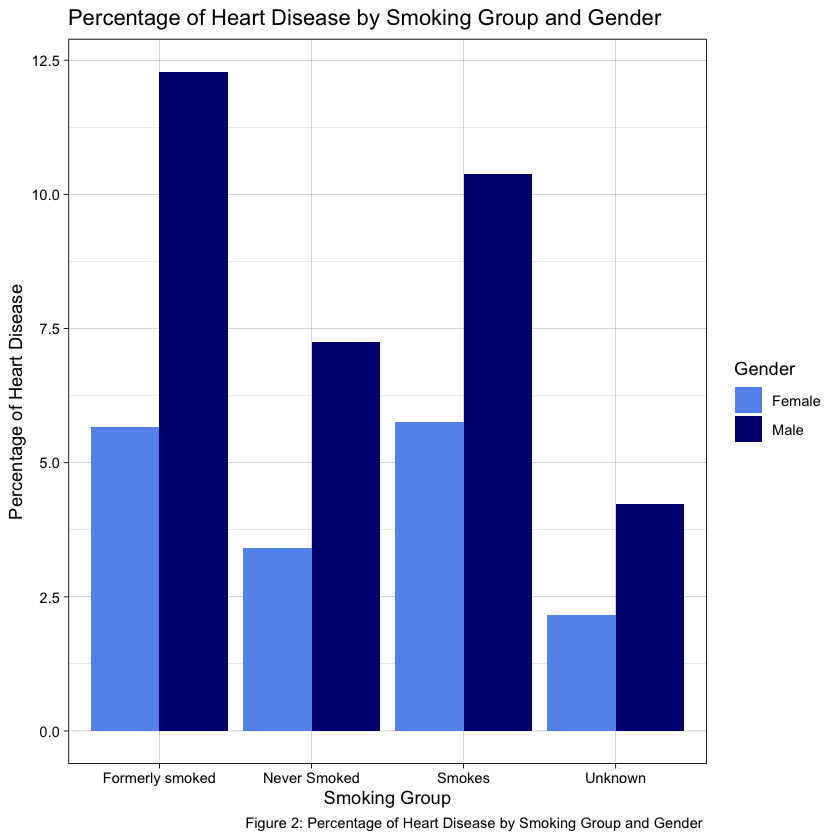

In [80]:
library("ggplot2")
data3 <- read.csv("stroke-data.csv")
male <- data3[data3$gender == "Male", ]
female <- data3[data3$gender == "Female", ]

f_m <- male[male$smoking_status == "formerly smoked", ]
n_m <- male[male$smoking_status == "never smoked", ]
s_m <- male[male$smoking_status == "smokes", ]
u_m <- male[male$smoking_status == "Unknown", ]

f_f <- female[female$smoking_status == "formerly smoked", ]
n_f <- female[female$smoking_status == "never smoked", ]
s_f <- female[female$smoking_status == "smokes", ]
u_f <- female[female$smoking_status == "Unknown", ]

m_list <- list(f_m, n_m, s_m, u_m)
f_list <- list(f_f, n_f, s_f, u_f)

percentage_heart <- function(data_list) {
  results <- numeric(length(data_list))
  for (i in seq_along(data_list)) {
    df <- data_list[[i]]
    results[i] <- sum(df$heart_disease == 1)/length(df$heart_disease)*100}
return(results)}

results_df <- data.frame(
  Group = c("f_m", "n_m", "s_m", "u_m", "f_f", "n_f", "s_f", "u_f"),
  Percentage = c(percentage_heart(m_list), percentage_heart(f_list)),
  Gender = rep(c("Male", "Female"), each = 4),  
  SmokingGroup = rep(c("Formerly smoked", "Never Smoked", "Smokes", "Unknown"), 2))

ggplot(results_df, aes(x = SmokingGroup, y = Percentage, fill = Gender)) +
  geom_bar(stat = "identity", position = "dodge") + 
  labs(title = "Percentage of Heart Disease by Smoking Group and Gender",
       x = "Smoking Group",
       y = "Percentage of Heart Disease",
       caption = "Figure 2: Percentage of Heart Disease by Smoking Group and Gender ") +
  theme_linedraw() + 
  scale_fill_manual(values = c("Male" = "navy", "Female" = "cornflowerblue")) 


The bar plot in Figure 2 illustrates the percentage of males and females who have experienced a heart attack, categorized by their smoking status. The four groups being compared include patients who are former smokers, current smokers, non-smokers, and those with unknown smoking status.

From the plot, it is evident that the relationship between smoking and heart attacks is consistent across genders. In each smoking category, the percentage of heart attacks among females is approximately half that of males, indicating a proportional correlation between smoking and heart attack prevalence for both sexes. It is also worth noting that males over all have twice as many heart attacks as females, given the particualar dataset. 

